In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

datos=pd.read_csv("C:/Users/alber/Escritorio\Manual/bases de corneas/Cd-M1-Epitelio 10um.csv",sep=";")
datos

,Fuerza,Indentacion,Distancia
0,-8.043710e-07,0.0,-1.175240e-08
1,-7.955700e-07,0.0,-1.170200e-08
2,-7.867690e-07,0.0,-1.176500e-08
3,-7.779680e-07,0.0,-1.185330e-08
4,-7.691670e-07,0.0,-1.179020e-08
...,...,...,...
28295,1.642310e-06,100.0,4.856060e-08
28296,1.651120e-06,100.0,4.892630e-08
28297,1.659920e-06,100.0,4.935500e-08
28298,1.668720e-06,100.0,4.992240e-08


In [2]:
agrupados=datos.groupby("Indentacion").mean()
agrupados.reset_index(inplace=True,drop=True)
agrupados

,Fuerza,Distancia
0,4.365740e-07,2.459102e-09
1,4.365740e-07,3.129338e-09
2,4.365740e-07,3.778994e-09
3,4.365740e-07,4.069643e-09
4,4.365740e-07,3.888248e-09
...,...,...
95,4.365740e-07,4.938256e-09
96,4.365740e-07,5.220975e-09
97,4.365740e-07,5.531230e-09
98,4.365740e-07,6.234353e-09


In [3]:
# Modelo de Hertz
def Hertz(F,R,D):
    return (3*F*0.75)/(4*(R**(1/2))*(D**(3/2)))
# Modelo de Sneddon
def Sneddon(F,theta1,D):
    return (F*0.75*math.pi)/(2*(D**2)*(math.tan(theta1)))
# Modelo de Rico
def regular(F,theta,D):
    return (F*0.75*math.sqrt(2))/(math.tan(theta)*(D**2 ))

In [4]:
lista1=[]
lista2=[]
lista3=[]
MY1=0
MY2=0
MY3=0

anguloSneddon=30*math.pi/180
anguloRico=35*math.pi/180

for i in range(0,100):
    MY1=Hertz(agrupados.iloc[i,0],8E-9,agrupados.iloc[i,1])
    lista1.append(MY1)

for i in range(0,100):
    MY2=Sneddon(agrupados.iloc[i,0],anguloSneddon,agrupados.iloc[i,1])
    lista2.append(MY2)

for i in range(0,100):
    MY3=regular(agrupados.iloc[i,0],anguloRico,agrupados.iloc[i,1])
    lista3.append(MY3)

C:\Users\alber\AppData\Local\Temp\ipykernel_17260\549815500.py:3: RuntimeWarning: invalid value encountered in double_scalars
  return (3*F*0.75)/(4*(R**(1/2))*(D**(3/2)))


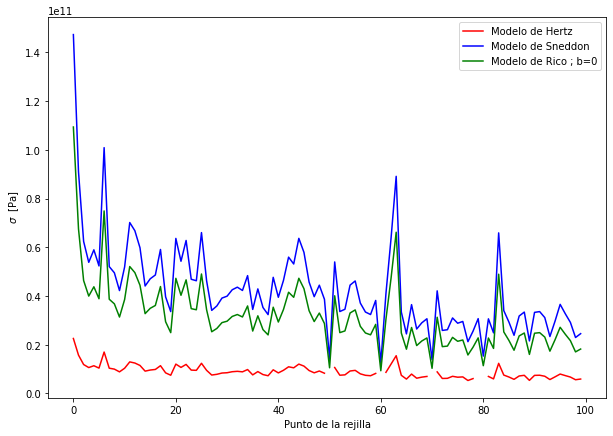

In [5]:
plt.figure(figsize=(10,7))
plt.plot(lista1,color="red",label="Modelo de Hertz")
plt.legend()
plt.plot(lista2,color="blue",label="Modelo de Sneddon")
plt.legend()
plt.plot(lista3,color="green",label="Modelo de Rico ; b=0")
plt.legend()
plt.xlabel("Punto de la rejilla")
plt.ylabel(" $\sigma$  [Pa]")
plt.show()

In [6]:

lista1a=pd.DataFrame(lista1)
lista1a.dropna()

,0
0,2.251492e+10
1,1.568399e+10
2,1.181874e+10
3,1.057550e+10
4,1.132412e+10
...,...
95,7.911795e+09
96,7.277932e+09
97,6.674256e+09
98,5.577611e+09


In [8]:
print(f"Modulo de Young promedio, modelo de Hertz: {lista1a[0].mean():.4f}")
print(f"Modulo de Young promedio, modelo de Sneddon: {np.mean(lista2):.4f}")
print(f"Modulo de Young promedio, modelo de Rico: {np.mean(lista3):.4f}")

Modulo de Young promedio, modelo de Hertz: 8953423858.3550
Modulo de Young promedio, modelo de Sneddon: 42549765813.2218
Modulo de Young promedio, modelo de Rico: 31586745821.7081
